# Microdados ENEM 2023 – Nordeste

Proposição 1:
- Calcular as médias por cada estado, em relação a cada uma das provas do ENEM:
    - Ciências da Natureza
    - Ciências Humanas
    - Linguagens e Códigos
    - Matemática
- Plotar os resultados
- Pergunta: *Qual estado teve a maior e a menor média por prova?*

Proposição 2:
- Calcular a **moda** da faixa da renda de cada estado
- Corelacionar as médias das provas (calculadas anteriomente) com o resultado da moda de cada estado
- Pergunta: *Existe relação entre renda e nota, a depender da região?*

Proposição 3:
- Filtrar o grau de escolaridade dos pais
- Pergunta: *Quanto maior o grau de escolaridade, maior a renda?*

## Setup

### Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

### Carregar CSV em um `Dataframe`

In [27]:
microdados_df = pd.read_csv(
    "../../datasets/microdados-enem-2023-nordeste.csv",
    sep=";",
    decimal=",",
    encoding="utf-8",
    encoding_errors="ignore"
)

microdados_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210060214087,2023,17 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Nao,Nao,Sim
1,210059980948,2023,18 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, um",Nao,Nao,Nao
2,210059085130,2023,23 anos,Maculino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2018,Não respondeu,...,"Sim, um",Nao,Sim,"Sim, um",Nao,Nao,"Sim, quatro ou mais",Nao,"Sim, um",Sim
3,210059980942,2023,22 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2019,Não respondeu,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Nao,"Sim, um",Sim
4,210058061534,2023,19 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Sim,Nao,Sim


### Selecionar somente as colunas necessárias

Em um novo `Dataframe`, selecionar as seguintes colunas:
- SG_UF_PROVA (sigla do estado onde o inscrito fez a prova)
- NU_NOTA_CN (nota da prova de ciências da natureza)
- NU_NOTA_CH (nota da prova de ciências humanas)
- NU_NOTA_LC (nota da prova de linguagens e códigos)
- NU_NOTA_MT (nota da prova de matemática)
- Q001 (faixa do grau de escolaridade do pai)
- Q002 (faixa do grau de escolaridade da mãe)
- Q006 (faixa da renda familiar)

In [33]:
notas_estados_microdados_df = microdados_df[[
        "SG_UF_ESC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "Q001", "Q002", "Q006"
    ]]

notas_estados_microdados_df.head()

,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006
0,CE,459.0,508.5,507.2,466.7,Completou a 8a serie/9o ano do ensino fundamen...,Completou a 8a serie/9o ano do ensino fundamen...,"De R$ 1.320,01 ate R$ 1.980,00."
1,CE,402.5,379.2,446.9,338.3,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
2,NaN,644.9,620.2,626.9,736.3,"Completou a Faculdade, mas nao completou a Pos...","Completou a 4a serie/5o ano, mas nao completou...","Ate R$ 1.320,00"
3,NaN,510.8,313.4,388.5,415.6,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,Nenhuma Renda
4,PA,515.7,553.1,544.4,437.0,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"


### Remover linhas que tenham algum valor "NaN"

In [34]:
notas_estados_microdados_df = notas_estados_microdados_df.dropna(axis=0, how="any")
notas_estados_microdados_df.head()

,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006
0,CE,459.0,508.5,507.2,466.7,Completou a 8a serie/9o ano do ensino fundamen...,Completou a 8a serie/9o ano do ensino fundamen...,"De R$ 1.320,01 ate R$ 1.980,00."
1,CE,402.5,379.2,446.9,338.3,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
4,PA,515.7,553.1,544.4,437.0,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
11,CE,615.0,620.5,534.0,645.1,Nao sei,"Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
16,BA,447.9,568.2,560.8,639.0,"Completou a 4a serie/5o ano, mas nao completou...","Completou a 4a serie/5o ano, mas nao completou...","Ate R$ 1.320,00"


### Remover linhas referentes ao estado do Pará

Por acidente, quando o dataset foi tratado para separar somente a região nordeste, o estado de Pernanbuco (PE) foi trocado pelo estado do Pará (PA).

In [35]:
notas_estados_microdados_df = notas_estados_microdados_df[notas_estados_microdados_df["SG_UF_ESC"] != "PA"]
notas_estados_microdados_df.head()

,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006
0,CE,459.0,508.5,507.2,466.7,Completou a 8a serie/9o ano do ensino fundamen...,Completou a 8a serie/9o ano do ensino fundamen...,"De R$ 1.320,01 ate R$ 1.980,00."
1,CE,402.5,379.2,446.9,338.3,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
11,CE,615.0,620.5,534.0,645.1,Nao sei,"Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
16,BA,447.9,568.2,560.8,639.0,"Completou a 4a serie/5o ano, mas nao completou...","Completou a 4a serie/5o ano, mas nao completou...","Ate R$ 1.320,00"
17,CE,499.1,546.8,533.0,534.3,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"


### Calcular média por estado

Prova: Ciências da Natureza

In [60]:
# Agrupar por estado e calcular a média somente da prova de Ciências da Natureza:
media_prova_cn_por_estado = notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_CN"].mean()

# Transformar a variável do tipo "Series" de volta para "DataFrame":
media_prova_cn_por_estado.reset_index()

,index,SG_UF_ESC,NU_NOTA_CN
0,0,AL,476.888444
1,1,AM,468.600000
2,2,AP,505.450000
3,3,BA,497.872167
4,4,CE,464.978441
5,5,DF,503.620000
6,6,ES,465.650000
7,7,GO,484.950000
8,8,MA,463.808960
9,9,MG,470.380392


Gerar gráfico de distribuição (barras)

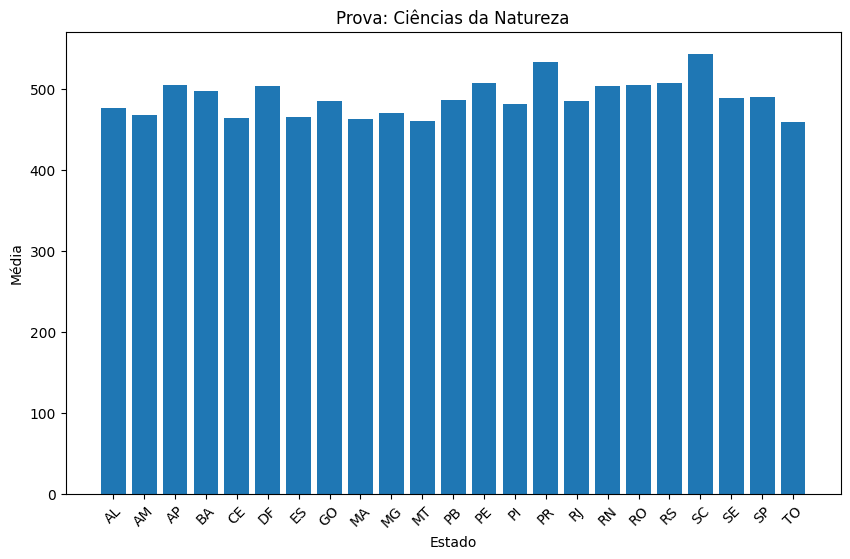

In [61]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_cn_por_estado["SG_UF_ESC"], media_prova_cn_por_estado["NU_NOTA_CN"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Prova: Ciências da Natureza")
plt.xticks(rotation=45)
plt.show()

Prova: Ciências Humanas

In [ ]:
# Agrupar por estado e calcular a média somente da prova de Ciências Humanas:
media_prova_ch_por_estado = notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_CH"].mean()

# Transformar a variável do tipo "Series" de volta para "DataFrame":
media_prova_ch_por_estado.reset_index()

,index,SG_UF_ESC,NU_NOTA_CH
0,0,AL,502.483859
1,1,AM,466.831250
2,2,AP,480.150000
3,3,BA,527.560874
4,4,CE,488.767197
5,5,DF,537.650000
6,6,ES,507.050000
7,7,GO,527.116667
8,8,MA,489.879882
9,9,MG,493.420588


Plotar gráfico de distribuição (barras)

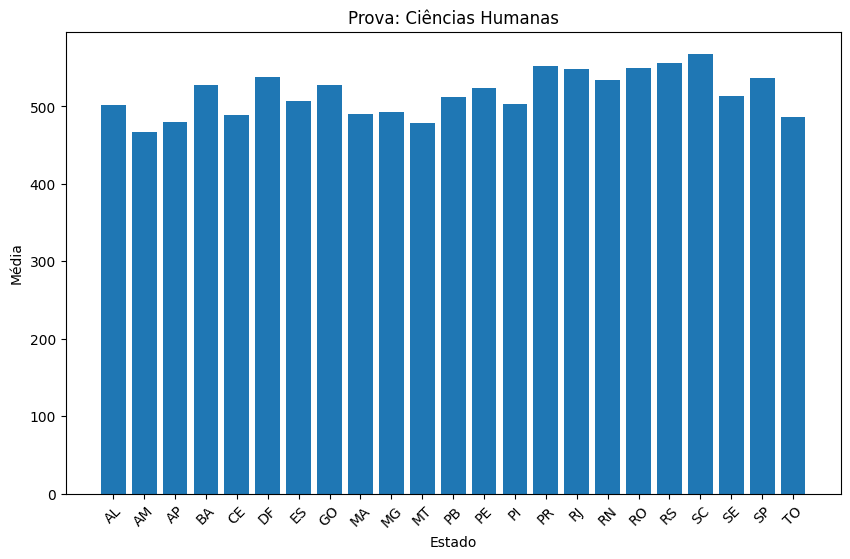

In [63]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_ch_por_estado["SG_UF_ESC"], media_prova_ch_por_estado["NU_NOTA_CH"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Prova: Ciências Humanas")
plt.xticks(rotation=45)
plt.show()

Prova: Liguagens e Códigos

In [ ]:
# Agrupar por estado e calcular a média somente da prova de Linguagens e Códigos:
media_prova_lc_por_estado = notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_LC"].mean()

# Transformar a variável do tipo "Series" de volta para "DataFrame":
media_prova_lc_por_estado.reset_index()

,index,SG_UF_ESC,NU_NOTA_LC
0,0,AL,497.590736
1,1,AM,464.718750
2,2,AP,510.500000
3,3,BA,518.661256
4,4,CE,489.681646
5,5,DF,515.700000
6,6,ES,530.575000
7,7,GO,507.205556
8,8,MA,485.499591
9,9,MG,489.222549


Plotar gráfico de distribuição (barras)

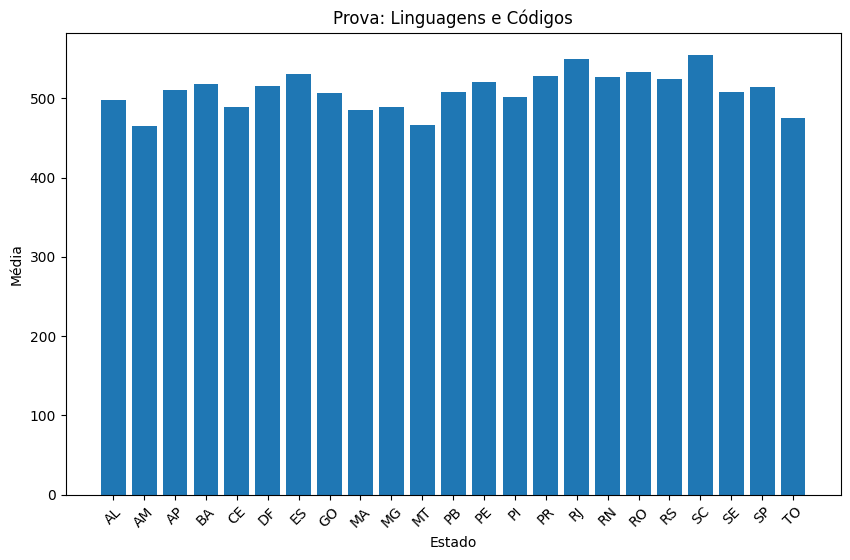

In [65]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_lc_por_estado["SG_UF_ESC"], media_prova_lc_por_estado["NU_NOTA_LC"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Prova: Linguagens e Códigos")
plt.xticks(rotation=45)
plt.show()

Prova: Matemática

In [66]:
# Agrupar por estado e calcular a média somente da prova de Matemática:
media_prova_mt_por_estado = notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_MT"].mean()

# Transformar a variável do tipo "Series" de volta para "DataFrame":
media_prova_mt_por_estado.reset_index()

,index,SG_UF_ESC,NU_NOTA_MT
0,0,AL,513.064702
1,1,AM,476.918750
2,2,AP,471.450000
3,3,BA,540.848016
4,4,CE,498.874168
5,5,DF,554.320000
6,6,ES,531.737500
7,7,GO,560.500000
8,8,MA,486.734986
9,9,MG,505.300000


Plotar gráfico de distribuição (barras)

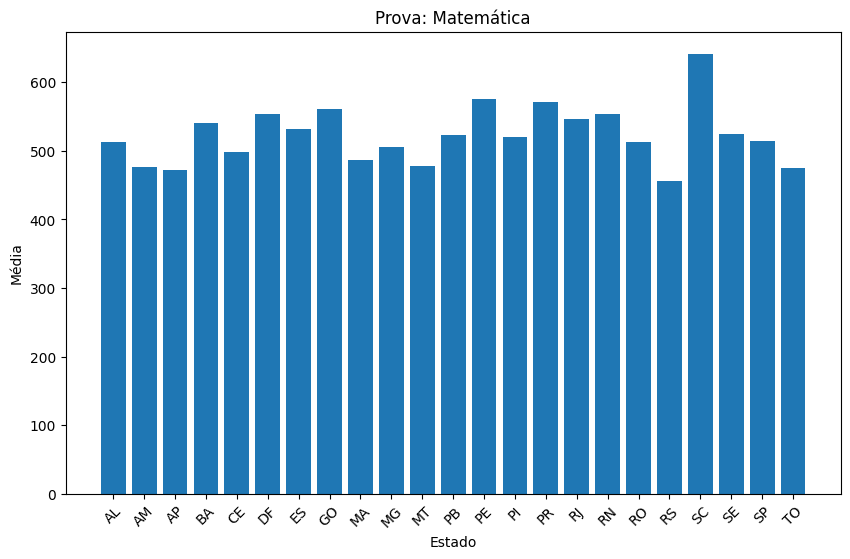

In [67]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_mt_por_estado["SG_UF_ESC"], media_prova_mt_por_estado["NU_NOTA_MT"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Prova: Matemática")
plt.xticks(rotation=45)
plt.show()